## **Implemention of The Single Neuron Model Package**

---

### **Candidates_data Dataset**

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

sns.set_theme()

df = pd.read_csv("Datasets/candidates_data.csv")
df["gmat"] = df["gmat"]/100

X = df[["gpa", "gmat"]].values

# Set classification target labels for the perceptron model
perceptron_targets = np.where(df["admitted"] == 0, -1, 1)

# Set the 0-1 target labels for the logistic regression model
logistic_targets = np.where(df["admitted"] == 0, 0, 1)

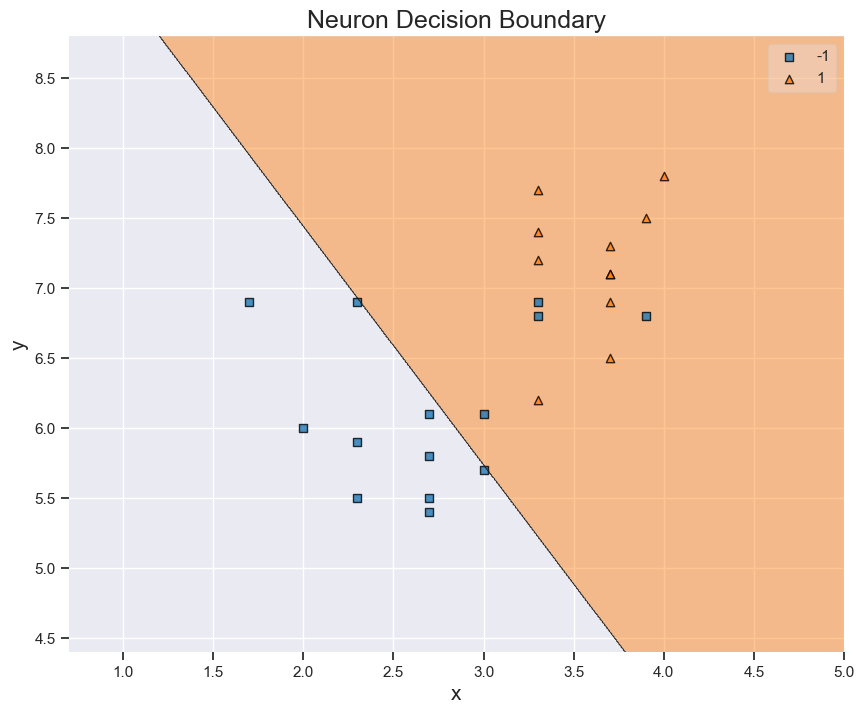

In [99]:
import custom_ml.single_neuron as node

clf1 = node.Perceptron_Neuron()
clf1.train(X, perceptron_targets, alpha = 0.03, epochs = 1000)
clf1.plot_decision_boundary(X, perceptron_targets)

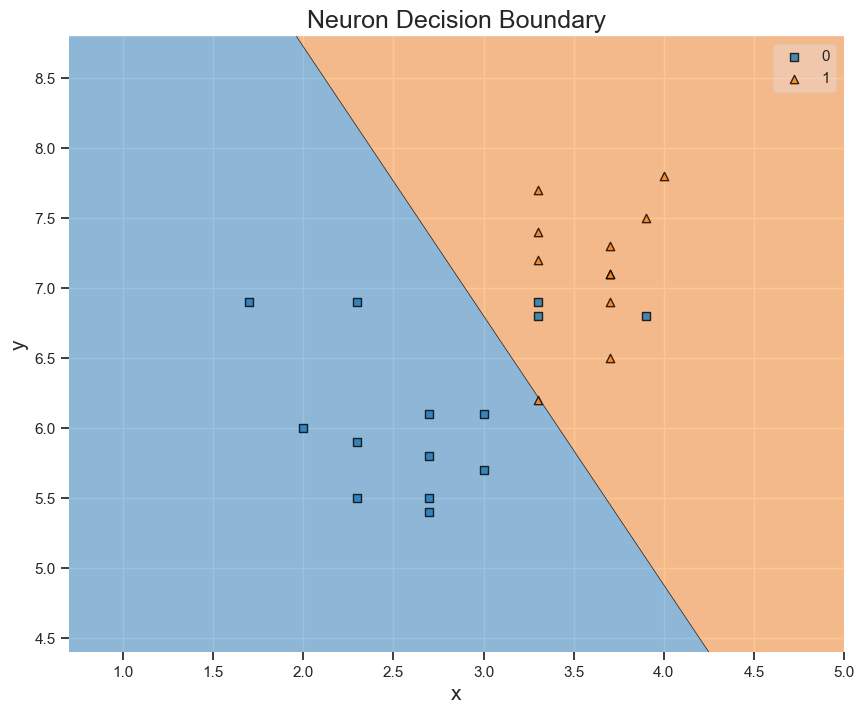

In [100]:
clf1 = node.Logistic_Regression_Neuron()
clf1.train(X, logistic_targets, alpha = 0.03, epochs = 1000)
clf1.plot_decision_boundary(X, logistic_targets)

In [154]:
from custom_ml.model_selection import train_test_split

X = df[["gpa", "gmat"]].values
y = np.where(df["admitted"] == 0, -1, 1)

from sklearn.utils import shuffle
def train_test_split(X, y, percent=.4):
    X, y = shuffle(X, y)
    split_index = np.int64(np.round(X.shape[0])*percent)
    X_train, y_train = X[:split_index], y[:split_index]
    X_test, y_test = X[-split_index:], y[-split_index:]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split(X, y, percent = 0.3)

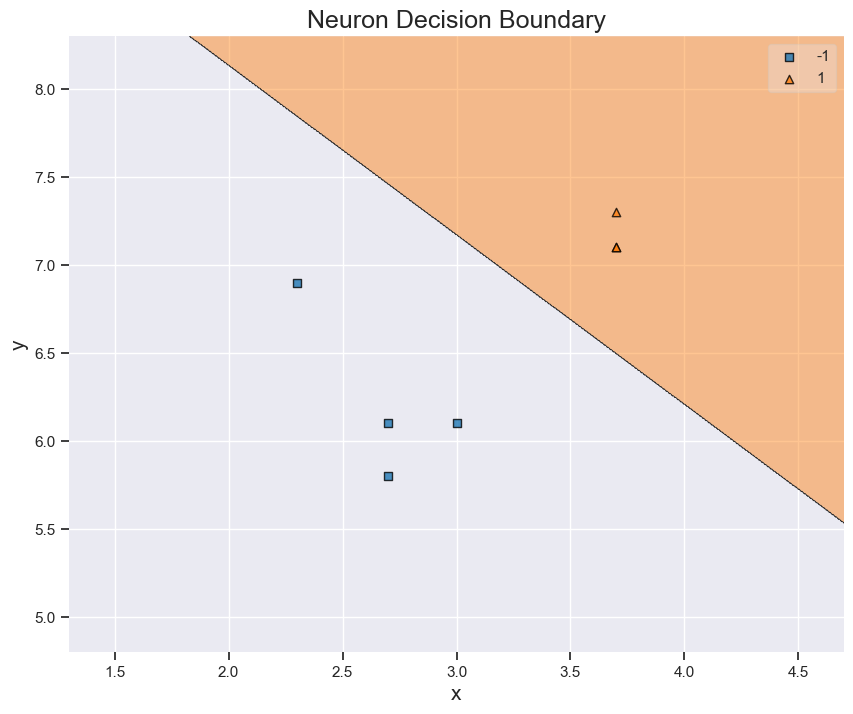

In [155]:
clf2 = node.Perceptron_Neuron()
clf2.train(X_train, y_train, alpha = 0.03, epochs = 5_000)

clf2.plot_decision_boundary(X_test, y_test)